In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [2]:
#import data from https://coronavirus.data.gov.uk/

cases1 = requests.get('https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv', stream=True)
cases = pd.read_csv(cases1.raw, parse_dates=['Specimen date'])

#Tidy up columns for reference
cases.columns = cases.columns.str.replace(' ', '')
cases.columns = cases.columns.str.replace('-', '')

#Change to weekly data
Weekcases = cases.groupby('Areaname').resample('W-Mon', on='Specimendate').sum().reset_index().sort_values(by='Specimendate')

In [3]:
#Filter data for Regions only
RegCasesWeek = Weekcases[(Weekcases.Areaname == 'South West') | (Weekcases.Areaname == 'South East') |\
                   (Weekcases.Areaname == 'London') | (Weekcases.Areaname == 'East of England') |\
                   (Weekcases.Areaname == 'West Midlands') | (Weekcases.Areaname == 'East Midlands') |\
                   (Weekcases.Areaname == 'Yorkshire and The Humber') | (Weekcases.Areaname == 'North East') |\
                   (Weekcases.Areaname == 'North West')]

In [6]:
#Select only Regions, Dates and No. Of Cases
RegCasesWeek2 = RegCasesWeek[['Areaname','Specimendate','Dailylabconfirmedcases']]

#Pivot for analysis
RegCasesWeekPiv = pd.DataFrame.pivot(RegCasesWeek2, index='Specimendate', columns='Areaname', values='Dailylabconfirmedcases') 

#Change Pivot back to normal Dataframe
RegCasesWeekPiv = pd.DataFrame(RegCasesWeekPiv.to_records())

RegCasesWeekPiv['East Midlands'] = RegCasesWeekPiv['East Midlands'].replace(np.nan, 0)
RegCasesWeekPiv['East of England'] = RegCasesWeekPiv['East of England'].replace(np.nan, 0)
RegCasesWeekPiv['London'] = RegCasesWeekPiv['London'].replace(np.nan, 0)
RegCasesWeekPiv['North East'] = RegCasesWeekPiv['North East'].replace(np.nan, 0)
RegCasesWeekPiv['North West'] = RegCasesWeekPiv['North West'].replace(np.nan, 0)
RegCasesWeekPiv['South East'] = RegCasesWeekPiv['South East'].replace(np.nan, 0)
RegCasesWeekPiv['South West'] = RegCasesWeekPiv['South West'].replace(np.nan, 0)
RegCasesWeekPiv['West Midlands'] = RegCasesWeekPiv['West Midlands'].replace(np.nan, 0)
RegCasesWeekPiv['Yorkshire and The Humber'] = RegCasesWeekPiv['Yorkshire and The Humber'].replace(np.nan, 0)

#Remove spaces from columns
RegCasesWeekPiv.columns = RegCasesWeekPiv.columns.str.replace(' ', '_')

#Add total cases column
RegCasesWeekPiv['Total'] = (RegCasesWeekPiv.East_Midlands + RegCasesWeekPiv.East_of_England + RegCasesWeekPiv.London \
                              + RegCasesWeekPiv.North_East + RegCasesWeekPiv.North_West \
                              + RegCasesWeekPiv.South_East + RegCasesWeekPiv.South_West \
                              + RegCasesWeekPiv.West_Midlands + RegCasesWeekPiv.Yorkshire_and_The_Humber)

#Add columns with share of cases
RegCasesWeekPiv['EMShare'] = round(((RegCasesWeekPiv.East_Midlands / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['EoEShare'] = round(((RegCasesWeekPiv.East_of_England / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['LDNShare'] = round(((RegCasesWeekPiv.London / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['NEShare'] = round(((RegCasesWeekPiv.North_East / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['NWShare'] = round(((RegCasesWeekPiv.North_West / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['SEShare'] = round(((RegCasesWeekPiv.South_East / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['SWShare'] = round(((RegCasesWeekPiv.South_West / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['WMShare'] = round(((RegCasesWeekPiv.West_Midlands / RegCasesWeekPiv.Total) * 100),1)
RegCasesWeekPiv['YTHShare'] = round(((RegCasesWeekPiv.Yorkshire_and_The_Humber / RegCasesWeekPiv.Total) * 100),1)

RegCasesWeekPiv

,Specimendate,East_Midlands,East_of_England,London,North_East,North_West,South_East,South_West,West_Midlands,Yorkshire_and_The_Humber,Total,EMShare,EoEShare,LDNShare,NEShare,NWShare,SEShare,SWShare,WMShare,YTHShare
0,2020-02-03,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,6.0,0.0,16.7,0.0,0.0,0.0,16.7,33.3,0.0,33.3
1,2020-02-10,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2,2020-02-17,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,25.0,0.0
3,2020-02-24,1.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,8.0,12.5,0.0,37.5,0.0,0.0,25.0,0.0,12.5,12.5
4,2020-03-02,7.0,4.0,29.0,1.0,15.0,9.0,11.0,6.0,10.0,92.0,7.6,4.3,31.5,1.1,16.3,9.8,12.0,6.5,10.9
5,2020-03-09,34.0,29.0,151.0,9.0,39.0,74.0,41.0,29.0,24.0,430.0,7.9,6.7,35.1,2.1,9.1,17.2,9.5,6.7,5.6
6,2020-03-16,156.0,159.0,1123.0,36.0,217.0,394.0,131.0,262.0,104.0,2582.0,6.0,6.2,43.5,1.4,8.4,15.3,5.1,10.1,4.0
7,2020-03-23,486.0,602.0,2899.0,176.0,726.0,1043.0,276.0,918.0,507.0,7633.0,6.4,7.9,38.0,2.3,9.5,13.7,3.6,12.0,6.6
8,2020-03-30,1037.0,1504.0,4988.0,747.0,2386.0,2296.0,785.0,2199.0,1361.0,17303.0,6.0,8.7,28.8,4.3,13.8,13.3,4.5,12.7,7.9
9,2020-04-06,1595.0,2292.0,5994.0,1848.0,4637.0,3479.0,1203.0,2575.0,1897.0,25520.0,6.2,9.0,23.5,7.2,18.2,13.6,4.7,10.1,7.4


In [9]:
#Filter columns for date and share of cases
RegWeekShare1 = RegCasesWeekPiv[['Specimendate','EMShare','EoEShare','LDNShare','NEShare', \
                                 'NWShare', 'SEShare', 'SWShare','WMShare','YTHShare']]

In [10]:
# Select data from 24 February - data is a bit wild before that point - F includes this week, without doesn't
RegCasesWeekPivMar = RegCasesWeekPiv[5:-1]
RegCasesWeekPivMarF = RegCasesWeekPiv[5:]
RegWeekShare = RegWeekShare1[5:-1]
RegWeekShareF = RegWeekShare1[5:]

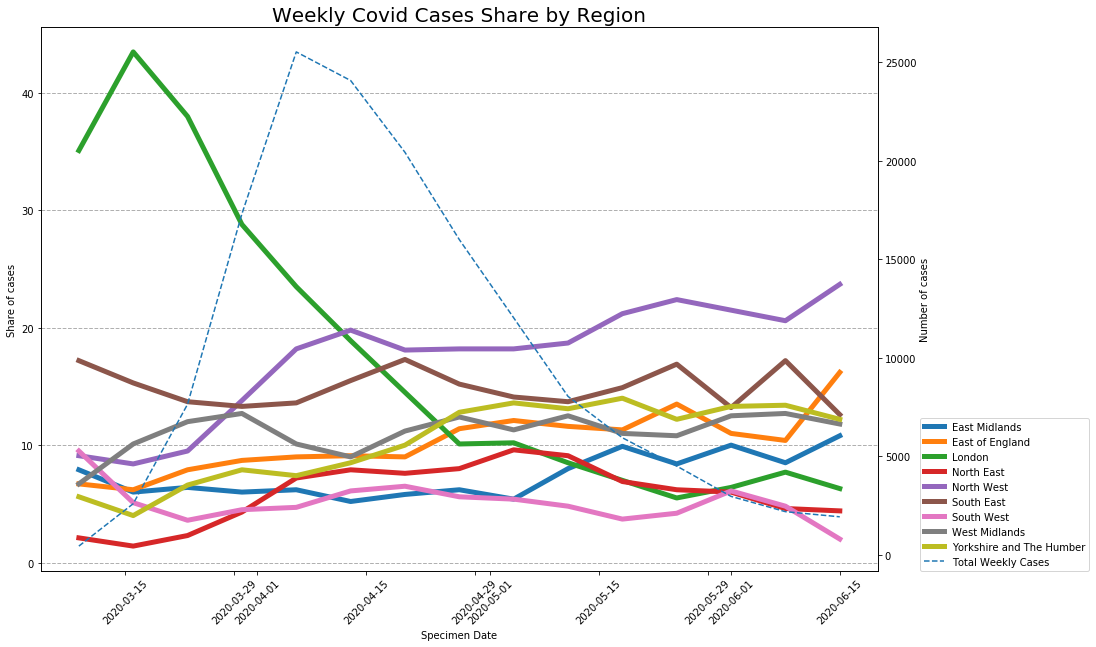

In [24]:
#Display line graph with share of 

import warnings
fig, ax1 = plt.subplots(figsize=(15,10))

EM = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.EMShare, linewidth=5.0, label='East Midlands')
EoE = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.EoEShare, linewidth=5.0, label='East of England')
LDN = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.LDNShare, linewidth=5.0, label='London')
NE = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.NEShare, linewidth=5.0, label='North East')
NW = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.NWShare, linewidth=5.0, label='North West')
SE = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.SEShare, linewidth=5.0, label='South East')
SW = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.SWShare, linewidth=5.0, label='South West')
WM = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.WMShare, linewidth=5.0, label='West Midlands')
YTH = ax1.plot(RegWeekShare.Specimendate,RegWeekShare.YTHShare, linewidth=5.0, label='Yorkshire and The Humber')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
Tot = ax2.plot(RegCasesWeekPivMar.Specimendate, RegCasesWeekPivMar.Total, '--', label='Total Weekly Cases')
ax2.tick_params(axis='y')



ax1.grid(axis='y', linestyle='--', linewidth=1)
plt.title('Weekly Covid Cases Share by Region', fontsize='20', fontweight='500')
ax1.set_xlabel('Specimen Date', fontweight='500')
ax1.set_ylabel('Share of cases', fontweight='500')
ax2.set_ylabel('Number of cases', fontweight='500')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
#plt.set_xticklabels(xlabels, rotation=90)
lns = EM+EoE+LDN+NE+NW+SE+SW+WM+YTH+Tot
ax1.legend(lns,[l.get_label() for l in lns], loc=(1.05,0))

warnings.filterwarnings('ignore')
warnings.warn('ignore')
fig.savefig('CovidCasesWeekShare.png',  bbox_inches='tight')
plt.show()

In [12]:
#Upload English Region Population data
RegPop = pd.read_csv('English Region Population.csv')
RegPop.PopulationShare = round(RegPop.PopulationShare * 100, 1)
RegPop.Population = RegPop.Population.str.replace(',', '')

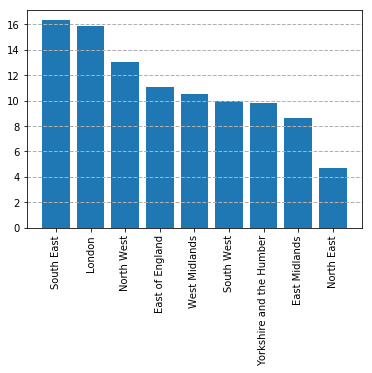

In [13]:
#Display Population Share by Region
plt.bar(RegPop.Region, RegPop.PopulationShare)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=1)
plt.savefig('PopShare.png',  bbox_inches='tight')
plt.show()

---Weekly Cases per 100k per Region

In [14]:
#Make a copy of Region Data
RegCasesWeekPerCapF = RegCasesWeekPivMarF

In [20]:
RegPop

,Region,Population,PopulationShare
0,South East,9133625,16.3
1,London,8908081,15.9
2,North West,7292093,13.0
3,East of England,6201214,11.1
4,West Midlands,5900757,10.5
5,South West,5599735,10.0
6,Yorkshire and the Humber,5479615,9.8
7,East Midlands,4804149,8.6
8,North East,2657909,4.7


In [21]:
#Add data for per 100k of population in each region
#I had a problem using the file, so I had to hard-code the numbers.

RegCasesWeekPerCapF['SEPerHunThou'] = round(((RegCasesWeekPerCapF.South_East / 9133625) * 100000),1)
RegCasesWeekPerCapF['LDNPerHunThou'] = round(((RegCasesWeekPerCapF.London / 8908081) * 100000),1)
RegCasesWeekPerCapF['NWPerHunThou'] = round(((RegCasesWeekPerCapF.North_West / 7292093) * 100000),1)
RegCasesWeekPerCapF['EoEPerHunThou'] = round(((RegCasesWeekPerCapF.East_of_England / 6201214) * 100000),1)
RegCasesWeekPerCapF['WMPerHunThou'] = round(((RegCasesWeekPerCapF.West_Midlands / 5900757) * 100000),1)
RegCasesWeekPerCapF['SWPerHunThou'] = round(((RegCasesWeekPerCapF.South_West / 5599735) * 100000),1)
RegCasesWeekPerCapF['YTHPerHunThou'] = round(((RegCasesWeekPerCapF.Yorkshire_and_The_Humber / 5479615) * 100000),1)
RegCasesWeekPerCapF['EMPerHunThou'] = round(((RegCasesWeekPerCapF.East_Midlands / 4804149) * 100000),1)
RegCasesWeekPerCapF['NEPerHunThou'] = round(((RegCasesWeekPerCapF.North_East / 2657909) * 100000),1)


RegCasesWeekPerCapF.head(50)

,Specimendate,East_Midlands,East_of_England,London,North_East,North_West,South_East,South_West,West_Midlands,Yorkshire_and_The_Humber,...,YTHShare,SEPerHunThou,LDNPerHunThou,SWPerHunThou,EoEPerHunThou,WMPerHunThou,YTHPerHunThou,EMPerHunThou,NEPerHunThou,NWPerHunThou
5,2020-03-09,34.0,29.0,151.0,9.0,39.0,74.0,41.0,29.0,24.0,...,5.6,0.8,1.7,0.7,0.5,0.5,0.4,0.7,0.3,0.5
6,2020-03-16,156.0,159.0,1123.0,36.0,217.0,394.0,131.0,262.0,104.0,...,4.0,4.3,12.6,2.3,2.6,4.4,1.9,3.2,1.4,3.0
7,2020-03-23,486.0,602.0,2899.0,176.0,726.0,1043.0,276.0,918.0,507.0,...,6.6,11.4,32.5,4.9,9.7,15.6,9.3,10.1,6.6,10.0
8,2020-03-30,1037.0,1504.0,4988.0,747.0,2386.0,2296.0,785.0,2199.0,1361.0,...,7.9,25.1,56.0,14.0,24.3,37.3,24.8,21.6,28.1,32.7
9,2020-04-06,1595.0,2292.0,5994.0,1848.0,4637.0,3479.0,1203.0,2575.0,1897.0,...,7.4,38.1,67.3,21.5,37.0,43.6,34.6,33.2,69.5,63.6
10,2020-04-13,1247.0,2197.0,4552.0,1901.0,4754.0,3737.0,1472.0,2166.0,2042.0,...,8.5,40.9,51.1,26.3,35.4,36.7,37.3,26.0,71.5,65.2
11,2020-04-20,1180.0,1841.0,2959.0,1549.0,3698.0,3536.0,1321.0,2291.0,2047.0,...,10.0,38.7,33.2,23.6,29.7,38.8,37.4,24.6,58.3,50.7
12,2020-04-27,987.0,1819.0,1622.0,1285.0,2915.0,2432.0,896.0,1986.0,2048.0,...,12.8,26.6,18.2,16.0,29.3,33.7,37.4,20.5,48.3,40.0
13,2020-05-04,648.0,1452.0,1222.0,1156.0,2191.0,1699.0,651.0,1362.0,1639.0,...,13.6,18.6,13.7,11.6,23.4,23.1,29.9,13.5,43.5,30.0
14,2020-05-11,641.0,932.0,680.0,728.0,1502.0,1104.0,383.0,1006.0,1054.0,...,13.1,12.1,7.6,6.8,15.0,17.0,19.2,13.3,27.4,20.6


In [22]:
#Select only columns for graphing purposes
RegCasesWeekPerCap1 = RegCasesWeekPerCapF[['Specimendate','SEPerHunThou','LDNPerHunThou','NWPerHunThou',\
                                          'SWPerHunThou', 'EoEPerHunThou', 'WMPerHunThou', \
                                          'YTHPerHunThou','EMPerHunThou','NEPerHunThou']]
RegCasesWeekPerCap2 = RegCasesWeekPerCap1[:-1]

RegCasesWeekPerCap1.head(25)

,Specimendate,SEPerHunThou,LDNPerHunThou,NWPerHunThou,SWPerHunThou,EoEPerHunThou,WMPerHunThou,YTHPerHunThou,EMPerHunThou,NEPerHunThou
5,2020-03-09,0.8,1.7,0.5,0.7,0.5,0.5,0.4,0.7,0.3
6,2020-03-16,4.3,12.6,3.0,2.3,2.6,4.4,1.9,3.2,1.4
7,2020-03-23,11.4,32.5,10.0,4.9,9.7,15.6,9.3,10.1,6.6
8,2020-03-30,25.1,56.0,32.7,14.0,24.3,37.3,24.8,21.6,28.1
9,2020-04-06,38.1,67.3,63.6,21.5,37.0,43.6,34.6,33.2,69.5
10,2020-04-13,40.9,51.1,65.2,26.3,35.4,36.7,37.3,26.0,71.5
11,2020-04-20,38.7,33.2,50.7,23.6,29.7,38.8,37.4,24.6,58.3
12,2020-04-27,26.6,18.2,40.0,16.0,29.3,33.7,37.4,20.5,48.3
13,2020-05-04,18.6,13.7,30.0,11.6,23.4,23.1,29.9,13.5,43.5
14,2020-05-11,12.1,7.6,20.6,6.8,15.0,17.0,19.2,13.3,27.4


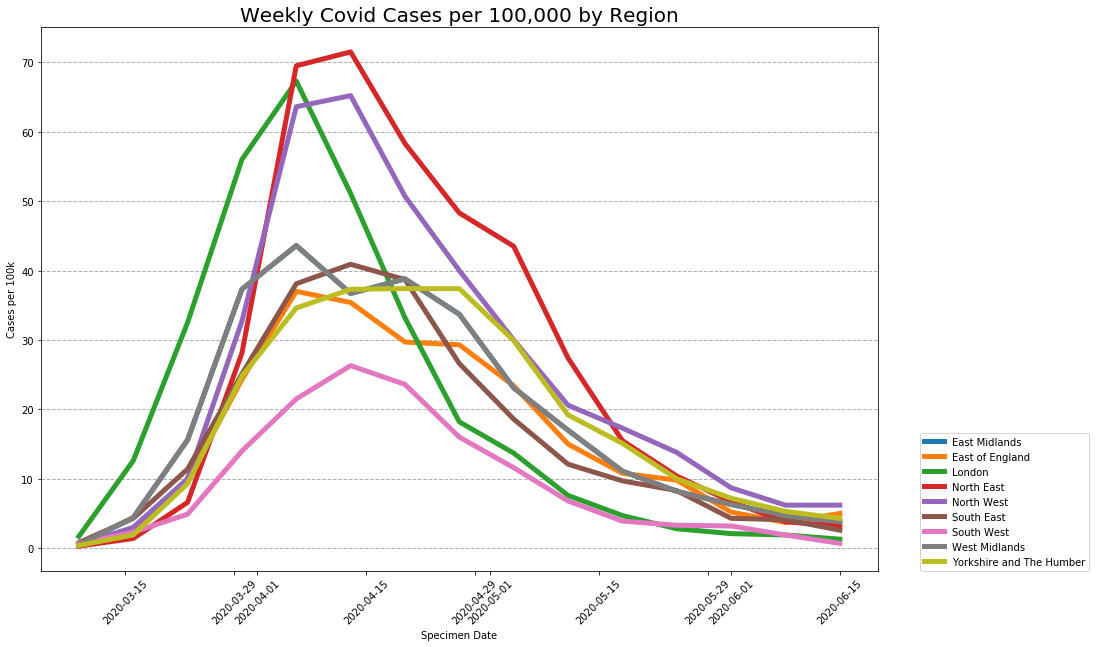

In [26]:
#Create graph and save up until the end of last week

import warnings
fig1, ax1 = plt.subplots(figsize=(15,10))

EM = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.EMPerHunThou, linewidth=5.0, label='East Midlands')
EoE = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.EoEPerHunThou, linewidth=5.0, label='East of England')
LDN = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.LDNPerHunThou, linewidth=5.0, label='London')
NE = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.NEPerHunThou, linewidth=5.0, label='North East')
NW = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.NWPerHunThou, linewidth=5.0, label='North West')
SE = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.SEPerHunThou, linewidth=5.0, label='South East')
SW = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.SWPerHunThou, linewidth=5.0, label='South West')
WM = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.WMPerHunThou, linewidth=5.0, label='West Midlands')
YTH = ax1.plot(RegCasesWeekPerCap2.Specimendate,RegCasesWeekPerCap2.YTHPerHunThou, linewidth=5.0, label='Yorkshire and The Humber')
ax1.tick_params(axis='y')

ax1.grid(axis='y', linestyle='--', linewidth=1)
plt.title('Weekly Covid Cases per 100,000 by Region', fontsize='20', fontweight='500')
ax1.set_xlabel('Specimen Date', fontweight='500')
ax1.set_ylabel('Cases per 100k', fontweight='500')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
#plt.xticks(RegWeekShare.Specimendate, rotation=90)
#plt.set_xticklabels(xlabels, rotation=90)
#plt.xticks(rotation=45)
#plt.legend(loc=(1,0))
#ax1.legend(loc=(1.2,0))
lns = EM+EoE+LDN+NE+NW+SE+SW+WM+YTH
ax1.legend(lns,[l.get_label() for l in lns], loc=(1.05,0))

warnings.filterwarnings("ignore")
fig1.savefig('CovidCasesPer100k.png',  bbox_inches='tight')
plt.show()